In [1]:
import os,sys
import pandas as pd 
import matplotlib.pyplot as plt

# Import csv's
antigen_df = pd.read_csv('chip_atlas_antigen_list.csv')
celltype_df = pd.read_csv('chip_atlas_celltype_list.csv')
file_df = pd.read_csv('chip_atlas_file_list.csv')
exp_df = pd.read_csv('chip_atlas_experiment_list.csv')

In [36]:
# Extract Metadata from Experiment Entries
new_df = exp_df
new_df = new_df.set_index('Experimental ID')

exp_list = []
for idx,row in new_df.iterrows():
    
    meta_dict = []
    try: 
        meta_list = row['Meta data'].strip().split('||')
        for att in meta_list: 
            tup = att.strip().split('=')
            if len(tup) == 1:
                tup = ['misc', str(tup[0])]
            elif len(tup) > 2:
                tup[1:] = [' '.join(tup[1:])]
            meta_dict.append(tuple(tup))
    
    # No Metadata Available
    except:
        pass
    
    meta_dict.append(('exp_ID', idx))        
    exp_list.append(dict(meta_dict))
    
exp_meta_df = pd.DataFrame(exp_list)
exp_meta_df = exp_meta_df.set_index('exp_ID')

In [37]:
# Create Combined Dataframe with All Experimental Information
full_exp_df = exp_meta_df.join(exp_df)

In [58]:
# Output Attributes to a Text File
with open("attributes.txt", 'w') as f:
    f.write("\n".join(sorted(list(full_exp_df))))

In [2]:
# Parameters
target = 'hg19'
cell_class = 'Blood'
cell_type = 'Lymphoblastoid cell line'

# Graphics
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#c2c2f0','ivory']
gen_dict = {'hg19': 'H. sapiens', 'mm9': 'M. musculus', 'sacCer3': 'S. cerevisiae', 'dm3':'D. melanogaster','ce10': 'C. elegans', 'rn6':'R. norvegicus'}

In [8]:
print(antigen_df.columns)
print(celltype_df.columns)
print(file_df.columns)

Index(['Genome assembly', 'Antigen class', 'Antigen', 'Number of experiments',
       'Experimental IDs included'],
      dtype='object')
Index(['Genome assembly', 'Cell type class', 'Cell type',
       'Number of experiments', 'Experimental IDs included'],
      dtype='object')
Index(['File name', 'Genome assembly', 'Antigen class', 'Antigen',
       'Cell type class', 'Cell type', 'Threshold',
       'Experimental IDs included', 'Peak-call (BED)'],
      dtype='object')


In [11]:
file_df.head()

,File name,Genome assembly,Antigen class,Antigen,Cell type class,Cell type,Threshold,Experimental IDs included,Peak-call (BED)
0,ALL.ALL.05.AllAg.AllCell,ce10,All antigens,NaN,All cell types,NaN,5,"SRX1769996,SRX466530,SRX466529,SRX2710284,SRX2...",http://dbarchive.biosciencedbc.jp/kyushu-u/ce1...
1,ALL.ALL.10.AllAg.AllCell,ce10,All antigens,NaN,All cell types,NaN,10,"SRX794055,SRX003821,SRX118222,SRX080072,SRX146...",http://dbarchive.biosciencedbc.jp/kyushu-u/ce1...
2,ALL.ALL.20.AllAg.AllCell,ce10,All antigens,NaN,All cell types,NaN,20,"SRX794055,SRX331286,SRX1769988,SRX494960,SRX33...",http://dbarchive.biosciencedbc.jp/kyushu-u/ce1...
3,ALL.ALL.50.AllAg.AllCell,ce10,All antigens,NaN,All cell types,NaN,50,"SRX794055,SRX331286,SRX1769988,SRX494960,SRX33...",http://dbarchive.biosciencedbc.jp/kyushu-u/ce1...
4,ALL.Adl.05.AllAg.Adult,ce10,All antigens,NaN,Adult,Adult,5,"SRX148639,SRX794055,SRX743640,SRX794054,SRX958...",http://dbarchive.biosciencedbc.jp/kyushu-u/ce1...


In [3]:
# Count Series
gen_counts = pd.Series.value_counts(antigen_df['Genome assembly']).rename(gen_dict)
antigen_counts = antigen_df.groupby(['Genome assembly','Antigen class']).sum().rename(gen_dict).unstack().rename_axis(None)

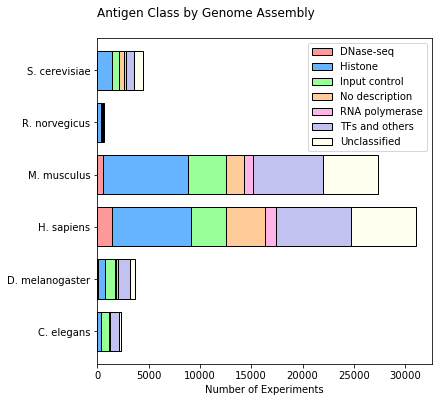

In [4]:
# Plot Antigen Class Breakdown
antigen_counts['Number of experiments'].plot(kind='barh', color=colors, 
                                             align='center',figsize=(6,6),stacked=True,width=0.75, edgecolor='k')
plt.title('Antigen Class by Genome Assembly\n',loc='left')
plt.axes().legend(loc='upper right')
plt.xlabel('Number of Experiments')
plt.show()

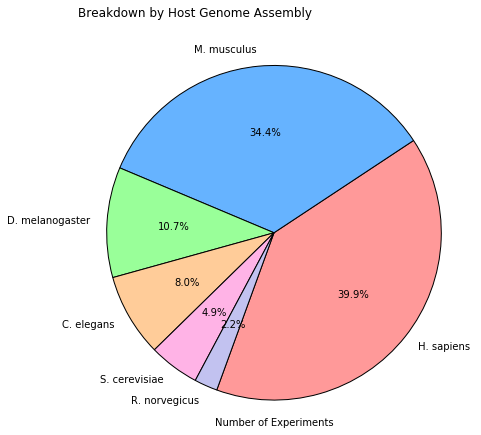

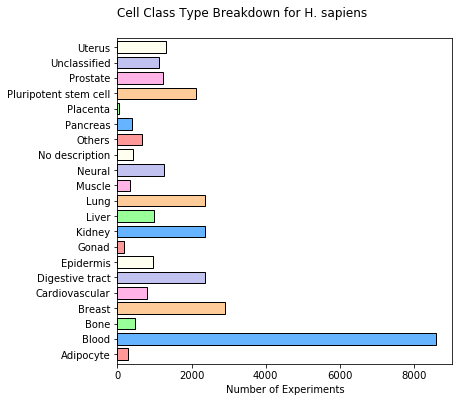

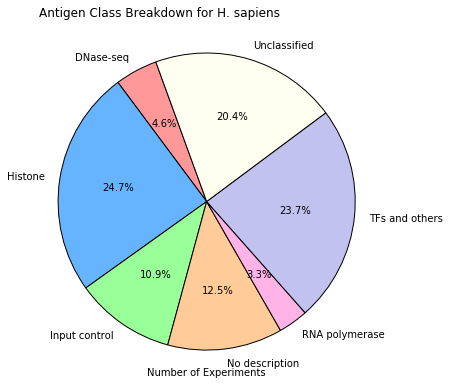

In [5]:
# Plot Host Genome Assembly Breakdown
plt.figure(1)
gen_counts.plot(kind='pie', colors = colors, autopct='%1.1f%%',
                startangle=250, wedgeprops={'linewidth':1, 'edgecolor':'black'}, figsize=(6,6))
plt.axis('equal')
plt.title('Breakdown by Host Genome Assembly\n\n',loc='left')
plt.tight_layout()
plt.xlabel('Number of Experiments')
plt.ylabel('')
plt.show()

# Cell Class Type Breakdown
celltype_df[celltype_df['Genome assembly'] == target].groupby('Cell type class').sum().rename_axis(None).plot(kind='barh', 
              color=colors, align='center',figsize=(6,6),stacked=True, width=0.75, edgecolor='k')
plt.title('Cell Class Type Breakdown for '+gen_dict[target]+'\n',loc='left')
plt.xlabel('Number of Experiments')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

# Antigen Breakdown
antigen_counts.loc[gen_dict[target]]['Number of experiments'].plot(kind='pie', colors = colors, autopct='%1.1f%%',
                startangle=110, wedgeprops={'linewidth':1, 'edgecolor':'black'}, figsize=(6,6))
plt.axis('equal')
plt.title('Antigen Class Breakdown for '+gen_dict[target]+'\n',loc='left')
plt.xlabel('Number of Experiments')
plt.ylabel('')
plt.show()

In [6]:
ctype_df = celltype_df[(celltype_df['Genome assembly'] == target) & (celltype_df['Cell type class'] == cell_class) & (celltype_df['Cell type'] == cell_type)].drop(['Genome assembly','Cell type class','Cell type'],axis=1)
target_experiments = pd.Series.tolist(ctype_df['Experimental IDs included'])[0].split(',')

print(int(ctype_df['Number of experiments'])," experiments found for: \n",gen_dict[target],' --> ',cell_class,' --> ',cell_type)

688  experiments found for: 
 H. sapiens  -->  Blood  -->  Lymphoblastoid cell line


In [9]:
ctype_df

NameError: name 'ctype_df' is not defined